In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

# DATA PRE-PROCESSING

In [2]:
### give path to the files
data = pd.read_csv(r"C:\Users\adithya\Desktop\CGS616\recommender system\ml-100k\u.data", sep='\t' , names=["user","movie_id","rating","timestamp"])

In [3]:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data= data.sort_values(by='user',ascending = True)
data.head()

,user,movie_id,rating,timestamp
66567,1,55,5,1997-09-24 03:44:48
62820,1,203,4,1997-11-03 07:30:31
10207,1,183,5,1997-09-24 03:37:42
9971,1,150,5,1997-10-15 05:09:56
22496,1,68,4,1997-09-24 03:44:48


In [4]:
### give path to the files
user_data = pd.read_csv(r"C:\\Users\\adithya\Desktop\\CGS616\\recommender system\\ml-100k\\u.user", sep = "|" , names=["age","gender", "work","timestamp"])
user_data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
user_data.head()

,age,gender,work,timestamp
1,24,M,technician,1998-04-04 19:22:22
2,53,F,other,1997-11-07 07:18:36
3,23,M,writer,1997-11-27 05:02:03
4,24,M,technician,1998-02-02 05:33:16
5,33,F,other,1998-01-07 14:20:06


In [5]:
columns  = ['movie_id','movie_title','rel_date','video_date','URL','unknown','Action','Adventure','Animation','Child','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
##Give path to the files
movie = pd.read_csv(r"C:\\Users\\adithya\Desktop\\CGS616\\recommender system\\ml-100k\\u.item", sep='|', names=columns, encoding='latin-1')
movie = movie.drop(labels = ['rel_date','video_date','URL'], axis =1)
movie

,movie_id,movie_title,unknown,Action,Adventure,Animation,Child,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
genre_columns = movie.columns[5:]

# Add a new column 'genres' to store the genres for each movie
movie['genres'] = ''

# Iterate over rows and update the 'genres' column
for index, row in movie.iterrows():
    genres = [column for column in genre_columns if row[column] == 1]
    movie.at[index, 'genres'] = ' '.join(genres)
film = movie[['movie_id','movie_title','genres']]
film.head()

,movie_id,movie_title,genres
0,1,Toy Story (1995),Animation Child Comedy
1,2,GoldenEye (1995),Thriller
2,3,Four Rooms (1995),Thriller
3,4,Get Shorty (1995),Comedy Drama
4,5,Copycat (1995),Crime Drama Thriller


In [9]:
data['movie_id'].value_counts().so

movie_id
50      583
258     509
100     508
181     507
294     485
       ... 
1565      1
1568      1
1582      1
1562      1
1682      1
Name: count, Length: 1682, dtype: int64

In [13]:
movie_ratings = data.merge(film,on = 'movie_id')
movie_ratings.head()

,user,movie_id,rating,timestamp,movie_title,genres
0,1,55,5,1997-09-24 03:44:48,"Professional, The (1994)",Crime Drama Romance Thriller
1,1,203,4,1997-11-03 07:30:31,Unforgiven (1992),Western
2,1,183,5,1997-09-24 03:37:42,Alien (1979),Horror Sci-Fi Thriller
3,1,150,5,1997-10-15 05:09:56,Swingers (1996),Comedy Drama
4,1,68,4,1997-09-24 03:44:48,"Crow, The (1994)",Romance Thriller


In [14]:
movie_ratings['movie_title'].value_counts()[0:10]

movie_title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64

In [17]:
mean_ratings = data.groupby('movie_id')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()
highest_rated = mean_ratings['rating'].idxmax()

movie_ratings[movie_ratings['movie_id'] == lowest_rated]

,user,movie_id,rating,timestamp,movie_title,genres
294,2,314,1,1998-03-04 02:54:45,3 Ninjas: High Noon At Mega Mountain (1998),Child
1843,13,314,1,1998-01-11 17:08:05,3 Ninjas: High Noon At Mega Mountain (1998),Child
20289,206,314,1,1998-02-22 20:39:08,3 Ninjas: High Noon At Mega Mountain (1998),Child
60470,537,314,1,1998-01-28 23:13:59,3 Ninjas: High Noon At Mega Mountain (1998),Child
67065,609,314,1,1998-02-07 23:59:01,3 Ninjas: High Noon At Mega Mountain (1998),Child


In [18]:
movie_ratings[movie_ratings['movie_id'] == highest_rated]

,user,movie_id,rating,timestamp,movie_title,genres
1798,13,814,5,1998-02-01 03:04:21,"Great Day in Harlem, A (1994)",Documentary


### Getting description of the movies

In [ ]:
pip install PyMovieDb

In [79]:
from PyMovieDb import IMDB
imdb = IMDB()

movie_descriptions = {}

for movie in film['movie_title'][0:10]:
    try:
        res = imdb.get_by_name(movie, tv=False)
        description = res['description'] if 'description' in res else 'No description available'
        movie_descriptions[movie] = description
        print(f'movie completed{movie}')
    except Exception as e:
        movie_descriptions[movie] = f"Error: {str(e)}"

movie completedGoldenEye (1995)
movie completedDead Man Walking (1995)
movie completedRichard III (1995)


### Frequent genre

In [19]:
from collections import Counter

genre_frequency = Counter(g for genres in film['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 28 genres.


Counter({'a': 1960,
         'r': 1845,
         'm': 1702,
         'e': 1277,
         'o': 1052,
         ' ': 876,
         'i': 872,
         'D': 775,
         'C': 736,
         'l': 704,
         'y': 699,
         'd': 627,
         'c': 454,
         'n': 430,
         'h': 373,
         'T': 251,
         'R': 247,
         't': 202,
         's': 166,
         'F': 147,
         '-': 125,
         'M': 117,
         'u': 106,
         'S': 101,
         'W': 98,
         'H': 92,
         'A': 42,
         'N': 24})

In [20]:
data.head()

,user,movie_id,rating,timestamp
66567,1,55,5,1997-09-24 03:44:48
62820,1,203,4,1997-11-03 07:30:31
10207,1,183,5,1997-09-24 03:37:42
9971,1,150,5,1997-10-15 05:09:56
22496,1,68,4,1997-09-24 03:44:48


In [25]:
from scipy.sparse import csr_matrix

def create_X(df):
    
    M = df['user'].nunique()
    N = df['movie_id'].nunique()
    
    user_mapper = dict(zip(np.unique(df['user']), range(M)))
    movie_mapper = dict(zip(np.unique(df['movie_id']), range(N)))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df['user'])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df['movie_id'])))
    
    user_index = [user_mapper[i] for i in df['user']]
    movie_index = [movie_mapper[i] for i in df['movie_id']]
    
    X = csr_matrix((df['rating'], (user_index,movie_index)), shape = (M,N))
    
    return X,user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X,user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(data)

In [26]:
X.shape

(943, 1682)

In [ ]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.kdeplot

#### Sparsity 

In [27]:
n_total = X.shape[0]* X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total

print(f'Matrix : {round(sparsity*100,2)}%')

Matrix : 6.3%


In [32]:
movie_titles = dict(zip(film['movie_id'],film['movie_title']))



# CONTENT BASED RECOMMENDER SYSTEMS 

In [47]:
# genres = set(g for G in film['genres'] for g in G)

genres = list(movie.columns)

genres.remove('movie_id')
genres.remove('movie_title')
# for g in genres:
    

In [51]:
genre_matrix = movie.drop(['movie_title','genres','movie_id'],axis = 1)

In [52]:
genre_matrix

,unknown,Action,Adventure,Animation,Child,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# from sklearn.metrics.pairwise import cosine_
movie.columns

Index(['movie_id', 'movie_title', 'unknown', 'Action', 'Adventure',
       'Animation', 'Child', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'genres'],
      dtype='object')

### GENRE BASED  (Binary feature matrix)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(genre_matrix,genre_matrix)

In [63]:
def get_reccomendation(title,top_n):
    idx = movie[movie['movie_title'] == title].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores,key = lambda x:x[1],reverse = True)
    movie_indices = [i[0] for i in similarity_scores[1:top_n + 1]]
    print(f"Because you watched {title}:")
    print(movie['movie_title'].iloc[movie_indices])

In [64]:
# title = input('title of movie ??')
get_reccomendation('12 Angry Men (1957)',10)

Because you watched 12 Angry Men (1957):
8                Dead Man Walking (1995)
14             Mr. Holland's Opus (1995)
17             White Balloon, The (1995)
18                 Antonia's Line (1995)
29                  Belle de jour (1967)
36                          Nadja (1994)
45                        Exotica (1994)
51    Madness of King George, The (1994)
56                         Priest (1994)
57                      Quiz Show (1994)
Name: movie_title, dtype: object


### Dimensionality Reduction with matrix factorization

In [65]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, n_iter=10)
Q = svd.fit_transform(X.T)
Q.shape

(1682, 20)

In [ ]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id,X,movie_mapper,movie_inv_mapper,k, metric = 'cosine'):
    
    
    X = X.T
    
    neighbours = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
        
    kNN = NearestNeighbors(n_neighbors= k+1, algorithm='brute', metric = metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    
    for i in range(0,k):
        n = neighbour.item(i)
        neighbours.append(movie_inv_mapper[n])
        
    neighbours.pop(0)
    
    return neighbours

In [67]:
similar_movies = find_similar_movies(1, Q.T, movie_mapper,movie_inv_mapper,k=10)
similar_movies

[151, 222, 121, 50, 181, 405, 117, 15, 596]

In [68]:
movie_titles = dict(zip(film['movie_id'],film['movie_title']))
for i in similar_movies:
    print(movie_titles[i])

Willy Wonka and the Chocolate Factory (1971)
Star Trek: First Contact (1996)
Independence Day (ID4) (1996)
Star Wars (1977)
Return of the Jedi (1983)
Mission: Impossible (1996)
Rock, The (1996)
Mr. Holland's Opus (1995)
Hunchback of Notre Dame, The (1996)


### Genre based (BAG of words)

In [995]:
# cosine similarity and bag of words
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


def create_bow(genre_list):
    bow = {}
    for genre in genre_list:
            bow[genre] = 1
    return bow


TITLES = film.movie_title.tolist()
GENRES = film.genres.str.split("|").tolist()


bags_of_words = [create_bow(movie_genres) for movie_genres in GENRES]
genre_df = pd.DataFrame(bags_of_words, index= TITLES).fillna(0)

# Calculate cosine similarity
cosine_sim = cosine_similarity(genre_df)

# Now 'cosine_sim' contains the pairwise cosine similarity between movies nad creating matrix dataframe
cosine_sim = pd.DataFrame(cosine_sim, index = movie.movie_title, columns = movie.movie_title)



In [996]:
#get the recommendation using bag of words techinque
index = cosine_sim.index.get_loc('12 Angry Men (1957)')

top_10 = cosine_sim.iloc[index].sort_values(ascending = False) [:10]

# print(f'Top 10 similar movies to {input} :')
print(top_10)


movie_title
Scream of Stone (Schrei aus Stein) (1991)    1.0
Neon Bible, The (1995)                       1.0
Princess Caraboo (1994)                      1.0
Short Cuts (1993)                            1.0
Rudy (1993)                                  1.0
Bronx Tale, A (1993)                         1.0
Vanya on 42nd Street (1994)                  1.0
Smoke (1995)                                 1.0
Crossing Guard, The (1995)                   1.0
Cry, the Beloved Country (1995)              1.0
Name: 12 Angry Men (1957), dtype: float64


### TF-IDF technique

In [997]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(film.genres)

#cosine similarity
cosi = cosine_similarity(tfidf_matrix)
similarity_df = pd.DataFrame(cosi,index = movie.movie_title, columns = movie.movie_title)

In [998]:
index = similarity_df.index.get_loc('12 Angry Men (1957)')

top_10 = similarity_df.iloc[index].sort_values(ascending = False) [1 :11]

# print(f'Top 10 similar movies to {input} :')
print(top_10)


movie_title
Ice Storm, The (1997)                          1.0
Ulee's Gold (1997)                             1.0
Ben-Hur (1959)                                 1.0
Gandhi (1982)                                  1.0
Delta of Venus (1994)                          1.0
Very Natural Thing, A (1974)                   1.0
Ulee's Gold (1997)                             1.0
Promesse, La (1996)                            1.0
Walk in the Sun, A (1945)                      1.0
My Life as a Dog (Mitt liv som hund) (1985)    1.0
Name: 12 Angry Men (1957), dtype: float64


### Based on AVERAGE RATING

In [406]:
#calculating average rating of the movie
average_ratings = data.groupby('movie_id')['rating'].mean().sort_values(ascending = False).reset_index()
average_ratings

,movie_id,rating
0,814,5.0
1,1599,5.0
2,1201,5.0
3,1122,5.0
4,1653,5.0
...,...,...
1677,1568,1.0
1678,1567,1.0
1679,1566,1.0
1680,1565,1.0


### Recommending Genre  on PAST DATA of User

In [454]:
user_genre_table = merged.groupby(['user', 'genres'])['rating'].count().unstack().fillna(0)

In [465]:
def suggest(user):
    foo = user_genre_table.iloc[user].nlargest(10).index.tolist()
    return foo
    

In [963]:
suggest(85)

['Comedy',
 'Romance',
 'Drama War',
 'Child',
 'Child Comedy',
 'Comedy Musical Romance',
 'Crime Drama Mystery',
 'Drama',
 'Drama Musical',
 'Drama Romance War']

# Profile-Based  or Collaborative filtering

## Memory based

In [964]:
merged.head()

,user,movie_id,rating,movie_title,genres
0,1,55,5,"Professional, The (1994)",Crime Drama Romance Thriller
1,1,203,4,Unforgiven (1992),Western
2,1,183,5,Alien (1979),Horror Sci-Fi Thriller
3,1,150,5,Swingers (1996),Comedy Drama
4,1,68,4,"Crow, The (1994)",Romance Thriller


In [965]:
mer = merged.pivot(index = 'movie_id',columns = 'user',values= 'rating')

#normalizing the values
norm = mer.subtract(mer.mean(axis = 1),axis = 0)

#using pearson correlation
sim_matrix = norm.T.corr()

### ITEM-ITEM

### Predicting Rating for unwatched movie

In [967]:
#getting unwatched data set
unwatched = pd.DataFrame(sim_matrix[4].isna())

In [987]:
#sorting based on movies wathed by target
target = 5
watched = pd.DataFrame(norm[target].dropna(axis=0, how='all')\
                            .sort_values(ascending=False))\
                            .rename(columns={1:'rating'})

In [990]:
move_id = 2

similarity_score = sim_matrix[[move_id]].rename(columns = {'movie_id' :'similarity'}).copy()

similarity_score = similarity_score.rename(columns = {'movie_id' : '',2 : 'similarity_scores'})
# similarity_score
# rank similarities between watched/rated movies and move_id
picked_userid_similarity = pd.merge(left=watched, 
                                    right= similarity_score, 
                                    on='movie_id', 
                                    how='inner')\
                                .sort_values('similarity_scores', ascending=False).fillna(0)
                                



In [993]:
import numpy as np
predic_rating = round(np.average(picked_userid_similarity[target],
                                 weights = picked_userid_similarity['similarity_scores']),5)
predic_rating

print(f'the predicted rating for movie id {move_id} by user {target} is {predic_rating}')

the predicted rating for movie id 2 by user 5 is -0.51085


### Recommending movie

##### item-item using KNN

In [29]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id,X,movie_mapper,movie_inv_mapper,k, metric = 'cosine'):
    
    
    X = X.T
    
    neighbours = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
        
    kNN = NearestNeighbors(n_neighbors= k+1, algorithm='brute', metric = metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    
    for i in range(0,k):
        n = neighbour.item(i)
        neighbours.append(movie_inv_mapper[n])
        
    neighbours.pop(0)
    
    return neighbours
    

In [33]:
similar_movies = find_similar_movies(1, X, movie_mapper,movie_inv_mapper,k=10)
similar_movies

[50, 181, 121, 117, 405, 151, 222, 100, 237]

In [34]:
movie_titles = dict(zip(film['movie_id'],film['movie_title']))
for i in similar_movies:
    print(movie_titles[i])

Star Wars (1977)
Return of the Jedi (1983)
Independence Day (ID4) (1996)
Rock, The (1996)
Mission: Impossible (1996)
Willy Wonka and the Chocolate Factory (1971)
Star Trek: First Contact (1996)
Fargo (1996)
Jerry Maguire (1996)


In [975]:
unwatched = pd.DataFrame(sim_matrix[2].isna())
unwatched = unwatched[unwatched[2] == True].index.tolist()

In [1001]:

def item_based(target,no_of_similar,no_of_reccomendation):
    import operator
    #list of unwatched movies
    unwatched = pd.DataFrame(sim_matrix[target].isna())
    unwatched = unwatched[unwatched[target] == True].index.tolist()
    
    #list of watched movies
    watched = pd.DataFrame(sim_matrix[target].dropna(axis=0, how='all')\
                            .sort_values(ascending=False))\
                            .rename(columns={1:'rating'})
                            
    rating_prediction = {}
    
    for picked_movie in unwatched:
        picked_movie_score = sim_matrix[[picked_movie]].rename(columns={picked_movie:'similarity_score'})
        #arrange them 
        picked_userid_similarity = pd.merge(left=watched, 
                                                right=picked_movie_score, 
                                                on='movie_id', 
                                                how='inner')\
                                        .sort_values('similarity_score', ascending=False)[:no_of_similar]
                    
        predict_rating = round(np.average(picked_userid_similarity['rating'], 
                                        weights=picked_userid_similarity['similarity_score']), 6)
        
        rating_prediction[picked_movie] = predict_rating
        
    return sorted(rating_prediction.items(),key = operator.itemgetter(1),reverse = True)[:no_of_reccomendation] 
        
        
        
recommended_movie = item_based(target=1, no_of_similar=10, no_of_reccomendation =10)
recommended_movie

[(314, nan),
 (360, 0.373592),
 (437, nan),
 (439, nan),
 (598, 0.233479),
 (442, 0.135305),
 (361, 0.102648),
 (438, 0.077065),
 (599, nan),
 (677, nan)]

### USER - USER collabarative approcah

In [1002]:
dat = data.pivot(index = "user", columns = "movie_id" ,values = "rating")
#normalizing to add up discrepensies
norm_matrix = dat.subtract(dat.mean(axis=1), axis=0)

Using Pearson Correlation

In [1003]:
similarity_matrix = normalized_ratings_matrix.T.corr()

In [1006]:
target_user = 5
n = 10
threshold = 0.1
similar_users = similarity_matrix[similarity_matrix[target_user] > threshold][target_user].sort_values(ascending = False)[:15]
target_watched = norm_matrix[norm_matrix.index == target_user].dropna(axis =1,how = 'all')
similar_user_movies = norm_matrix[norm_matrix.index.isin(similar_users.index)].dropna(axis=1, how='all')


Subtarcting the movies that are already rated/watched by target user

In [1007]:
similar_user_movies.drop(target_watched.columns,axis=1, inplace=True, errors='ignore')

In [1008]:
#reccomend a movie to target user based on similarity score as weight of the user

item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
ranked_item_score

,movie,movie_score
155,875,1.952381
176,955,1.952381
115,511,1.773333
19,133,1.773333
129,607,1.773333
...,...,...
203,1662,-2.047619
165,900,-2.226667
48,277,-2.250000
21,137,-3.133333


PREDICTING THE SCORES BY TARGET USER

In [1009]:
avg_rating_of_target = dat[dat.index == target_user].T.mean()[target_user]
avg_rating_of_target

2.874285714285714

In [1010]:
ranked_item_score['new_rating'] = ranked_item_score['movie_score'] + avg_rating_of_target
ranked_item_score

,movie,movie_score,new_rating
155,875,1.952381,4.826667
176,955,1.952381,4.826667
115,511,1.773333,4.647619
19,133,1.773333,4.647619
129,607,1.773333,4.647619
...,...,...,...
203,1662,-2.047619,0.826667
165,900,-2.226667,0.647619
48,277,-2.250000,0.624286
21,137,-3.133333,-0.259048


## MODEL BASED using KNN 

In [1011]:
matrix = merged.pivot(index = ['user'], columns = ['movie_id'],values = 'rating')
matrix = matrix.fillna(0)

In [1012]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute',n_neighbors = 10,n_jobs = -1)
knn.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [777]:
input_data = matrix.loc[2]  # Replace 'iloc' with 'loc' if using labels

# Reshape the input data to be 2D
reshaped_data = np.array(input_data).reshape(1, -1)


distances, indices = knn.kneighbors(reshaped_data, n_neighbors=10)


In [773]:
def  movie_engine(titl,matri,no_recommen):
    knn.fit(matri)
    # mov_id = process.extractOne(titl,film['movie_title'])[2]
    movie_row = film[film['movie_title'] == titl]
    
    
    if movie_row.empty:
        print(f"Movie with title '{titl}' not found in the dataset.")
        return
    
    
    moie_id = movie_row['movie_id'].values[0]
    
    input_data = matrix.loc[moie_id]
    reshaped_data = np.array(input_data).reshape(1,-1)
    
    distances, indices = knn.kneighbors(reshaped_data, n_neighbors= no_recommen)
    # distances, indices = cf_model.kneighbors(matrix[movie_id], n_neighbors=n_recs)
    # distance,indices = knn.kneighbors(matrix.loc[moie_id].values.reshape(1, -1), n_neighbors = no_recommen)
    req_ids = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    
    my_list = []
    
    
    for i in req_ids:
        # rec_movie_id = matrix.iloc[rec[0]].name
        # my_list.append({'Title': film.loc[rec_movie_id, 'movie_title'], 'Distance': rec[1]})
        my_list.append({'Title':film['movie_title'][i[0]],'Distance':i[1]})
        
    foo = pd.DataFrame(my_list, index = range(1,no_recommen))
    
    return foo



In [1014]:
#getting recommendations
no_recommen = 10
movie_engine('12 Angry Men (1957)', matrix,no_recommen)

,Title,Distance
1,"Day the Earth Stood Still, The (1951)",0.433637
2,All About Eve (1950),0.430785
3,My Fellow Americans (1996),0.426895
4,Lord of Illusions (1995),0.426318
5,I Know What You Did Last Summer (1997),0.413896
6,Speechless (1994),0.412443
7,"Sweet Hereafter, The (1997)",0.411680
8,Star Trek: First Contact (1996),0.390833
9,Old Yeller (1957),0.383042


In [56]:
movie.head()

,movie_id,movie_title,unknown,Action,Adventure,Animation,Child,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Animation Child Comedy
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Thriller
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Thriller
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Comedy Drama
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,Crime Drama Thriller


In [57]:
film.head()

,movie_id,movie_title,genres
0,1,Toy Story (1995),Animation Child Comedy
1,2,GoldenEye (1995),Thriller
2,3,Four Rooms (1995),Thriller
3,4,Get Shorty (1995),Comedy Drama
4,5,Copycat (1995),Crime Drama Thriller


## Movie FInder

In [93]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = film['movie_title'].to_list()
    closet_match = process.extractOne(title,all_titles)
    return closet_match[0]

In [94]:
movie_finder('father')

'Godfather, The (1972)'

# BYOP

In [87]:
de = pd.read_csv(r"C:\Users\adithya\Desktop\CGS616\recommender system\ml-100k\u.user", sep = '|', names=["user","age","gender","profession","suu"])

In [1]:
df = pd.DataFrame(dat)
df['Mean'] = df.mean(axis=1, skipna=True)
ratings_count = df.iloc[:, 1:].count(axis=1)
df['ratings_rated'] = ratings_count


In [1017]:
average_ratings_df = pd.DataFrame({
    'user': merged['user'].unique(),
    'average_rating': df['Mean'],
    'ratings' : df['ratings_rated']
})

In [2]:
final.head()

In [1018]:
de
final = pd.merge(de,average_ratings_df[['average_rating','ratings']],on = 'user')

In [1019]:
ratings_profession = final.groupby('profession')['average_rating'].mean().reset_index()


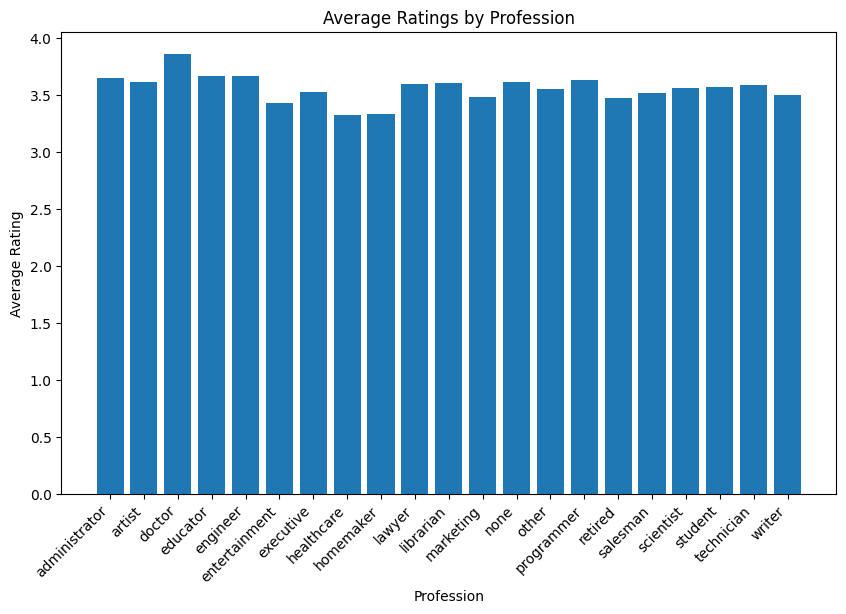

In [1020]:
import matplotlib.pyplot as plt

# Bar chart for average ratings by profession
plt.figure(figsize=(10, 6))
plt.bar(ratings_profession['profession'], average_ratings_by_profession['average_rating'])
plt.xlabel('Profession')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Profession')
plt.xticks(rotation=45, ha='right')
plt.show()


In [931]:
no_ratings_profession = final.groupby('profession')['ratings'].mean().reset_index()

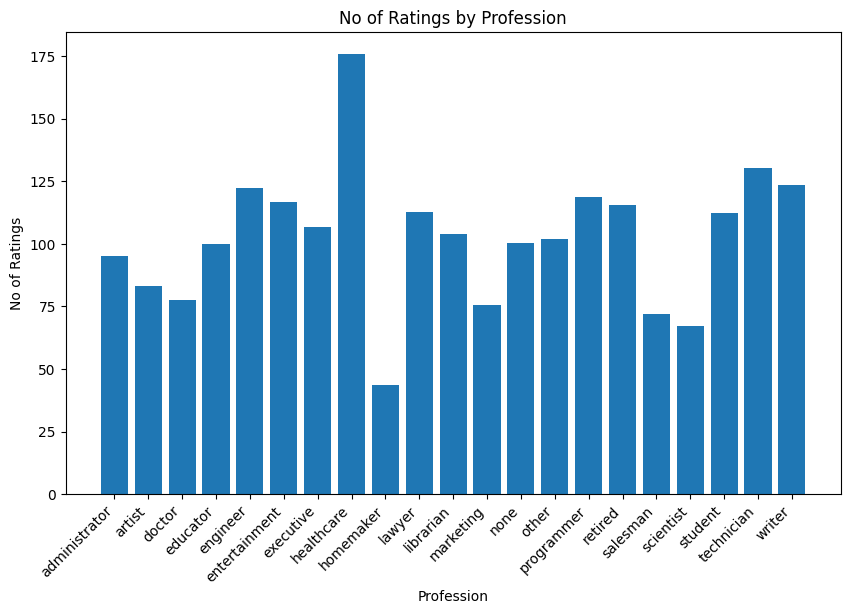

In [1021]:
# Bar chart for average ratings by profession
plt.figure(figsize=(10, 6))
plt.bar(no_ratings_profession['profession'], no_ratings_profession['ratings'])
plt.xlabel('Profession')
plt.ylabel('No of Ratings')
plt.title('No of Ratings by Profession')
plt.xticks(rotation=45, ha='right')
plt.show()


In [1022]:
ratings_gender = final.groupby('gender')['average_rating'].mean().reset_index()

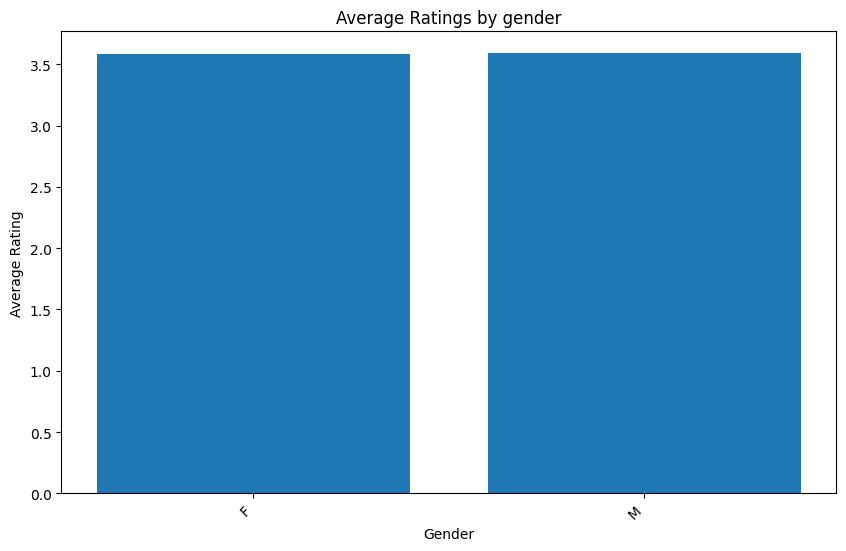

In [934]:
plt.figure(figsize=(10, 6))
plt.bar(ratings_gender['gender'], ratings_gender['average_rating'])
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.title('Average Ratings by gender')
plt.xticks(rotation=45, ha='right')
plt.show()


In [1023]:
no_ratings_gender = final.groupby('gender')['ratings'].mean().reset_index()

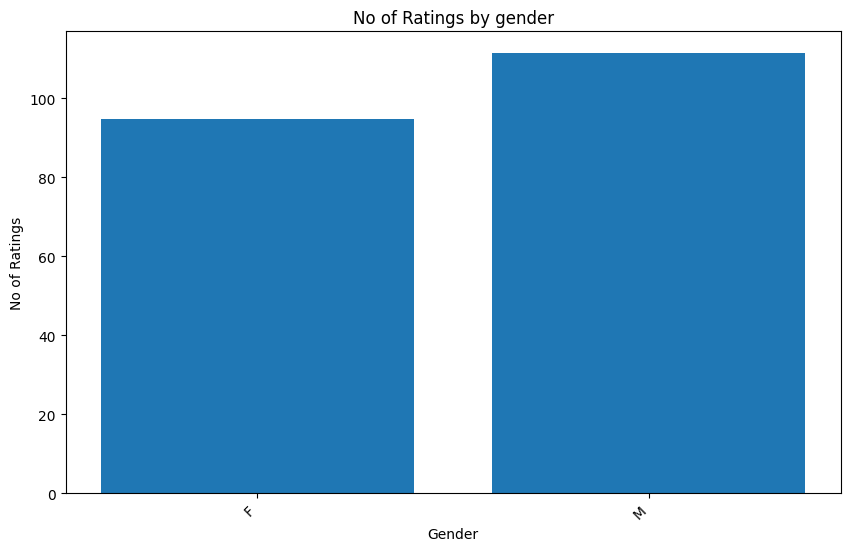

In [1024]:
plt.figure(figsize=(10, 6))
plt.bar(no_ratings_gender['gender'], no_ratings_gender['ratings'])
plt.xlabel('Gender')
plt.ylabel('No of Ratings')
plt.title('No of Ratings by gender')
plt.xticks(rotation=45, ha='right')
plt.show()

In [1025]:
bins = [0, 17, 24, 34, 44, 54, 64, 100]  # Define age group bins
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Define age group labels

# Apply the bins and labels to create a new 'AgeGroup' column
final['AgeGroup'] = pd.cut(final['age'], bins=bins, labels=labels, right=False)

In [1026]:
no_ratings_by_age_group = final.groupby('AgeGroup')['ratings'].count().reset_index()

C:\Users\adithya\AppData\Local\Temp\ipykernel_20048\1931881970.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_ratings_by_age_group = final.groupby('AgeGroup')['ratings'].count().reset_index()


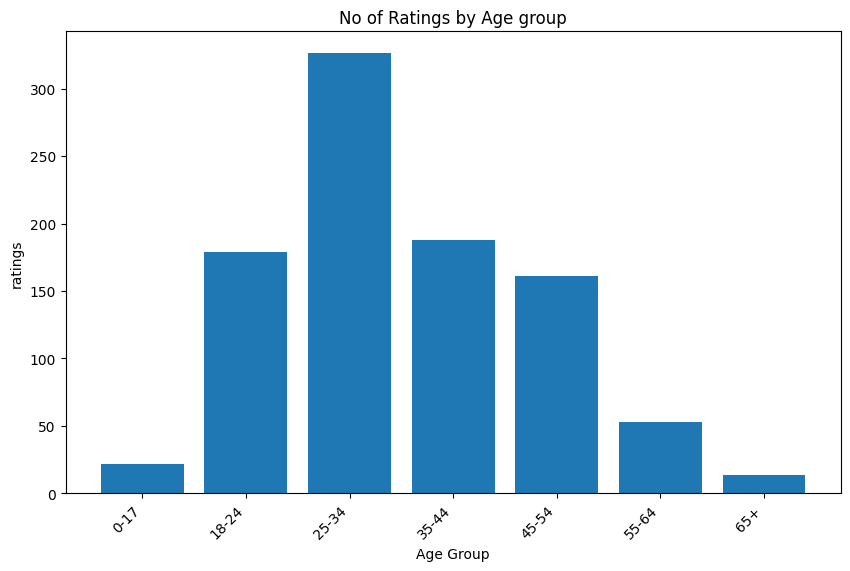

In [938]:
import matplotlib.pyplot as plt

# Bar chart for average ratings by profession
plt.figure(figsize=(10, 6))
plt.bar(no_ratings_by_age_group['AgeGroup'], no_ratings_by_age_group['ratings'])
plt.xlabel('Age Group')
plt.ylabel('ratings')
plt.title('No of Ratings by Age group')
plt.xticks(rotation=45, ha='right')
plt.show()


## Evaluation

In [69]:
## mask the data and pretend we dont know what the user has rated 
## get reccomendations and compare the them both

## use RMSE, precision,Recall,F1 score